In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

    Masked Retrieval Heads  Context. Faith. (XSum)
0                        0                   47.61
1                       10                   36.56
2                       20                   34.89
3                       30                   29.70
4                       40                   26.72
5                       50                   25.97
6                       60                   23.33
7                       70                   24.55
8                       80                   22.40
9                       90                   21.12
10                     100                   17.13
    Masked Retrieval Heads  Context. Faith. (MemoTrap)
0                        0                       65.86
1                       10                       66.76
2                       20                       64.44
3                       30                       65.92
4                       40                       66.83
5                       50                       68.08
6  

/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

    Masked Retrieval Heads  Fact. Recall (TriviaQA)
0                        0                    56.58
1                       10                    55.77
2                       20                    55.26
3                       30                    55.39
4                       40                    54.99
5                       50                    54.32
6                       60                    54.05
7                       70                    54.01
8                       80                    53.92
9                       90                    52.89
10                     100                    52.56
    Masked Retrieval Heads  Fact. Recall (PopQA)
0                        0                 26.64
1                       10                 25.84
2                       20                 25.39
3                       30                 25.32
4                       40                 25.35
5                       50                 25.04
6                       60       

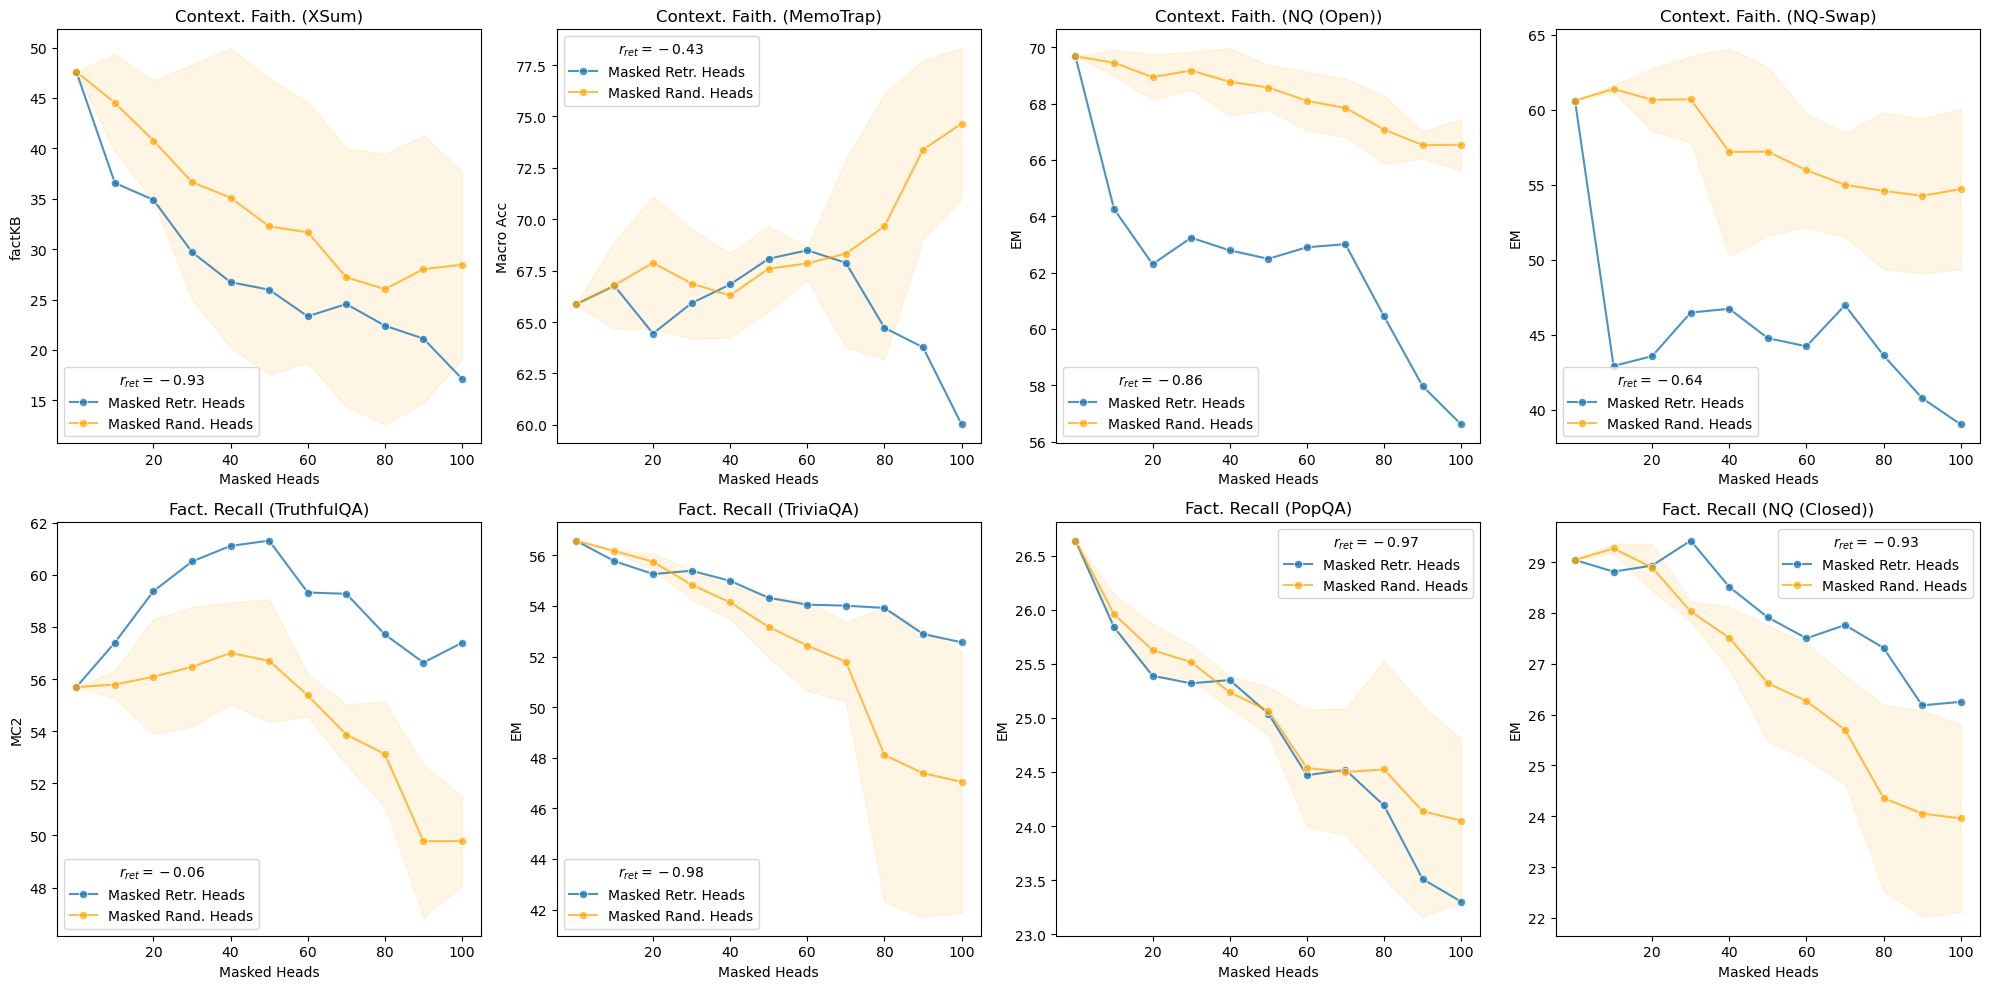

In [30]:
data_8b = {
    "Masked Retrieval Heads": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "Context. Faith. (XSum)": [47.61, 36.56, 34.89, 29.70, 26.72, 25.97, 23.33, 24.55, 22.40, 21.12, 17.13],
    "Context. Faith. (MemoTrap)": [65.86, 66.76, 64.44, 65.92, 66.83, 68.08, 68.49, 67.88, 64.72, 63.77, 60.02],
    "Context. Faith. (NQ (Open))": [69.68, 64.26, 62.30, 63.24, 62.79, 62.49, 62.90, 63.01, 60.45, 57.97, 56.61],
    "Context. Faith. (NQ-Swap)": [60.62, 42.92, 43.57, 46.48, 46.73, 44.77, 44.23, 46.97, 43.62, 40.77, 39.02],
    "Fact. Recall (TruthfulQA)": [55.69, 57.40, 59.37, 60.51, 61.11, 61.31, 59.32, 59.27, 57.71, 56.63, 57.39],
    "Fact. Recall (TriviaQA)": [56.58, 55.77, 55.26, 55.39, 54.99, 54.32, 54.05, 54.01, 53.92, 52.89, 52.56],
    "Fact. Recall (PopQA)": [26.64, 25.84, 25.39, 25.32, 25.35, 25.04, 24.47, 24.52, 24.19, 23.51, 23.30],
    "Fact. Recall (NQ (Closed))": [29.04, 28.81, 28.93, 29.42, 28.51, 27.91, 27.50, 27.76, 27.31, 26.18, 26.25],
}

data_8b_random = pd.read_csv('../evaluation_results/baseline_masked_random_heads.csv')

df = pd.DataFrame(data_8b)
df_random = data_8b_random.groupby('Masked Random Heads').agg(['mean', 'std']).reset_index()

# Adjusting the data to exclude the baseline from the x-axis
# df_no_baseline = df.iloc[1:]  # Exclude the baseline (first row) from the data

# plt.figure(figsize=(24, 6))
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.rcParams.update({'font.size': 10})

# Flatten axes for easy iteration
axes = axes.flatten()

metric_names = {
    "Context. Faith. (XSum)": "factKB",
    "Context. Faith. (MemoTrap)": "Macro Acc",
    "Context. Faith. (NQ (Open))": "EM",
    "Context. Faith. (NQ-Swap)": "EM",
    "Fact. Recall (TruthfulQA)": "MC2",
    "Fact. Recall (TriviaQA)": "EM",
    "Fact. Recall (PopQA)": "EM",
    "Fact. Recall (NQ (Closed))": "EM",
}

# Plot each column
for i, col in enumerate(df.columns[1:]):
    sns.lineplot(ax=axes[i], x="Masked Retrieval Heads", y=col, data=df, marker="o", label="Masked Retr. Heads", alpha=0.8)

    mean_values = df_random[(col, 'mean')].values
    std_values = df_random[(col, 'std')].fillna(0).values
    x_values = df_random[('Masked Random Heads', '')].values

    # sns.lineplot(ax=axes[i], x="Masked Random Heads", y=col, data=df_random, marker="x", alpha=0.8)
    sns.lineplot(ax=axes[i], x=x_values, y=mean_values, marker='o', label="Masked Rand. Heads", alpha=0.7, color="orange")
    ax=axes[i].fill_between(x_values, mean_values - std_values, mean_values + std_values, alpha=0.1, color="orange")
    
    # Add baseline line
    # axes[i].axhline(y=df[col][0], color='red', linestyle='--', label='Baseline')
    
    # Calculate Pearson correlation
    print(df[["Masked Retrieval Heads", col]])
    ret_correlation, _ = pearsonr(df["Masked Retrieval Heads"], df[col])
    # random_correlation, _ = pearsonr(x_values, mean_values)
    
    # # Add correlation as legend
    # axes[i].legend(title=f'$r_{{ret}}={ret_correlation:.2f}$\n$r_{{random}}={random_correlation:.2f}$')
    axes[i].legend(title=f'$r_{{ret}}={ret_correlation:.2f}$')

    axes[i].grid(False)
    axes[i].set_xticks([20, 40, 60, 80, 100])
    
    axes[i].set_title(col)
    axes[i].set_xlabel('Masked Heads')
    axes[i].set_ylabel(metric_names[col])

# Adjust layout
plt.tight_layout()

# pdf_path = 'result_baseline_num_retrieval_heads_correlation_8b.pdf'
# plt.savefig(pdf_path, format='pdf')

plt.show()


/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Figure size 1200x600 with 0 Axes>

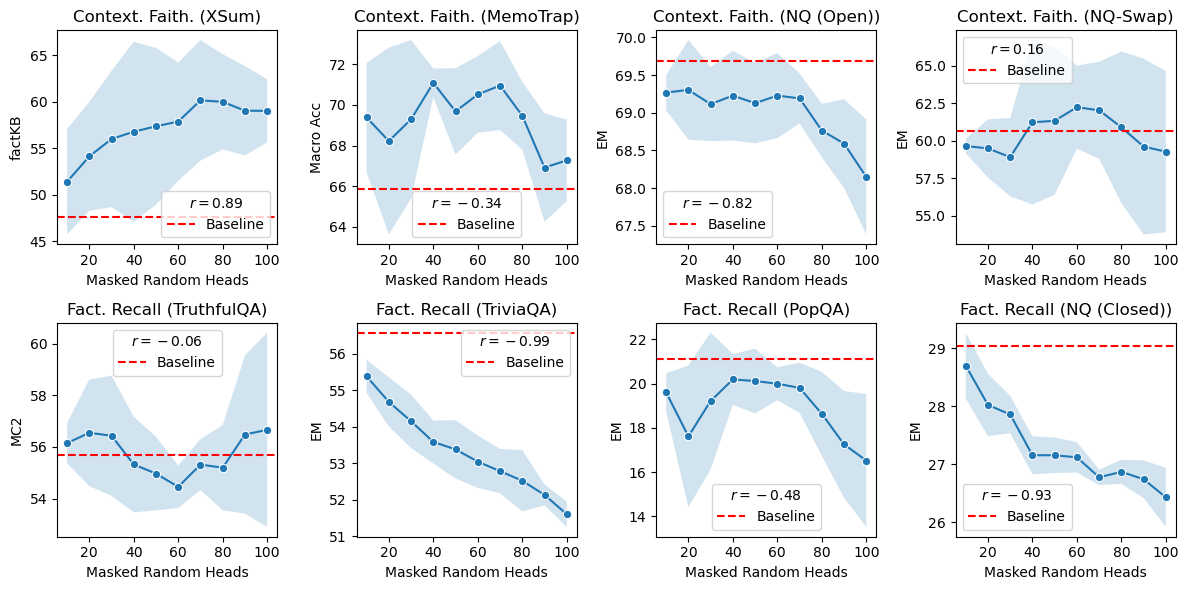

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the CSV file
df = pd.read_csv('../evaluation_results/baseline_masked_random_heads.csv')

# Extract the baseline (first row) and remove it from the dataframe
baseline = df.iloc[0]
df_no_baseline = df.iloc[1:]

# Group data by 'masked random heads' and calculate mean and std dev
grouped_df = df_no_baseline.groupby('Masked Random Heads').agg(['mean', 'std']).reset_index()

# Extract tasks (all columns except 'masked random heads' and 'random seed')
tasks = df.columns[1:]  # Exclude 'masked random heads' and 'random seed'

# Plotting
plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
plt.rcParams.update({'font.size': 10})

metric_names = {
    "Context. Faith. (XSum)": "factKB",
    "Context. Faith. (MemoTrap)": "Macro Acc",
    "Context. Faith. (NQ (Open))": "EM",
    "Context. Faith. (NQ-Swap)": "EM",
    "Fact. Recall (TruthfulQA)": "MC2",
    "Fact. Recall (TriviaQA)": "EM",
    "Fact. Recall (PopQA)": "EM",
    "Fact. Recall (NQ (Closed))": "EM",
}

# tasks = list(metric_names.keys())

for i, task in enumerate(tasks):
    ax = axes.flatten()[i]  # Select the appropriate subplot
    mean_values = grouped_df[(task, 'mean')].values
    std_values = grouped_df[(task, 'std')].values
    x_values = grouped_df[('Masked Random Heads', '')].values

    # Calculate Pearson correlation
    correlation, _ = pearsonr(x_values, mean_values)
    
    # Use seaborn lineplot with error bars
    sns.lineplot(ax=ax, x=x_values, y=mean_values, marker='o')
    ax.fill_between(x_values, mean_values - std_values, mean_values + std_values, alpha=0.2)
    
    # Add baseline line
    ax.axhline(y=baseline[task], color='red', linestyle='--', label='Baseline')

    ax.grid(False)

    ax.set_title(task)
    ax.set_xticks([20, 40, 60, 80, 100])
    ax.set_xlabel('Masked Random Heads')
    ax.set_ylabel(metric_names[task])
    ax.legend(title=f'$r={correlation:.2f}$')
    # ax.legend()

plt.tight_layout()
pdf_path = 'result_num_random_heads_correlation.pdf'
plt.savefig(pdf_path, format='pdf')

plt.show()